In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mh_df = pd.read_csv('data/cleaned_data/mh_cleaned.csv')
gs_df = pd.read_csv('data/cleaned_data/greenspace_cleaned.csv')

In [4]:
mh_df.rename(columns={'StateAbbr': 'State', 'PlaceName': 'Cities in Urban Center', 'Population2010': 'MH_Population', 'MHLTH_AdjPrev': 'MH_Score'}, inplace=True)
mh_df.head()

,State,Cities in Urban Center,MH_Population,MH_Score,MHLTH_Adj95CI,Geolocation
0,AL,Birmingham,212237,15.6,"(15.4, 15.8)","[33.5275663773, -86.7988174678]"
1,AL,Hoover,81619,10.4,"(10.1, 10.7)","[33.3767602729, -86.8051937568]"
2,AL,Huntsville,180105,13.4,"(13.2, 13.7)","[34.6989692671, -86.6387042882]"
3,AL,Mobile,195111,15.0,"(14.9, 15.2)","[30.6776248648, -88.1184482714]"
4,AL,Montgomery,205764,14.8,"(14.6, 15.1)","[32.3472645333, -86.2677059552]"


In [5]:
gs_df.drop(columns=['Unnamed: 0', 'Country'], inplace=True)
mh_df.drop(columns=['Geolocation', 'MHLTH_Adj95CI'], inplace=True)

In [6]:
# t1 = gs_df[gs_df['Cities in Urban Center'] == 'San Francisco']
# t2 = mh_df[mh_df['Cities in Urban Center'] == 'San Francisco']
# t2

In [7]:
df = pd.merge(mh_df, gs_df, on=['Cities in Urban Center', 'State'], how='inner')
df.head()

,State,Cities in Urban Center,MH_Population,MH_Score,UC Grouping,Urban Center Area,Latitude,Longitude,Urban Center,Biome,...,Particulate Matter Emissions Transport,Particulate Matter Emissions Agriculture,Total Concertation of Particulate Matter,% of Pop in High Green Area,% of Open Spaces,Land Use Efficiency,Max Magnitude of Heatwaves,Cities in Urban Center_copy,Region,Division
0,AL,Birmingham,212237,15.6,485,221.0,33.509025,-86.823651,Birmingham,Temperate Broadleaf and Mixed Forests,...,28.649599,0.007314,10.32690,0.773812,74.85,0.661872,20.218000,Birmingham;,South,East South Central
1,AL,Huntsville,180105,13.4,501,89.0,34.726065,-86.609995,Huntsville,Temperate Broadleaf and Mixed Forests,...,6.546265,0.472178,10.86525,0.802599,66.37,0.279665,26.787901,Huntsville,South,East South Central
2,AL,Mobile,195111,15.0,422,123.0,30.692377,-88.093685,Mobile,Temperate Coniferous Forests,...,12.988887,0.018721,10.41785,0.822213,63.32,0.750273,9.628220,Mobile,South,East South Central
3,AL,Montgomery,205764,14.8,481,154.0,32.360134,-86.249187,Montgomery,Temperate Broadleaf and Mixed Forests,...,10.836431,0.490166,11.33750,0.747151,75.47,1.659945,14.788300,Montgomery,South,East South Central
4,AL,Tuscaloosa,90468,15.5,470,45.0,33.199564,-87.553567,Tuscaloosa,Temperate Broadleaf and Mixed Forests,...,5.127923,0.163041,11.48650,0.411681,41.24,0.783592,14.610200,Tuscaloosa,South,East South Central


In [8]:
df.shape

(329, 40)

In [9]:
df.select_dtypes(include='object')

,State,Cities in Urban Center,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division
0,AL,Birmingham,Birmingham,Temperate Broadleaf and Mixed Forests,Acrisols,Birmingham;,South,East South Central
1,AL,Huntsville,Huntsville,Temperate Broadleaf and Mixed Forests,Acrisols,Huntsville,South,East South Central
2,AL,Mobile,Mobile,Temperate Coniferous Forests,Gleysols,Mobile,South,East South Central
3,AL,Montgomery,Montgomery,Temperate Broadleaf and Mixed Forests,Acrisols,Montgomery,South,East South Central
4,AL,Tuscaloosa,Tuscaloosa,Temperate Broadleaf and Mixed Forests,Acrisols,Tuscaloosa,South,East South Central
...,...,...,...,...,...,...,...,...
324,WI,Kenosha,Kenosha,"Temperate Grasslands, Savannas, and Shrublands",Luvisols,Kenosha,Midwest,East North Central
325,WI,Madison,Madison,Temperate Broadleaf and Mixed Forests,Luvisols,Madison,Midwest,East North Central
326,WI,Milwaukee,Milwaukee,Temperate Broadleaf and Mixed Forests,Luvisols,Milwaukee,Midwest,East North Central
327,WI,Racine,Racine,"Temperate Grasslands, Savannas, and Shrublands",Luvisols,Racine,Midwest,East North Central


In [10]:
df_alpha = df[['UC Grouping', 'State', 'Urban Center', 'Biome', 'Soil Group', 'Cities in Urban Center_copy', 'Region', 'Division']].copy()
df.drop(columns=['State', 'Urban Center', 'Cities in Urban Center', 'Biome', 'Soil Group', 'Cities in Urban Center_copy', 'Region', 'Division'], inplace=True)

In [11]:
cols = list(df.columns)
cols.remove('MH_Population')
print(cols)

['MH_Score', 'UC Grouping', 'Urban Center Area', 'Latitude', 'Longitude', 'Avg Elevation', 'Avg Precipitation', 'Avg Temp', 'Avg Greenness', 'Total Green Area', 'Population', 'Total Built-up Area', 'Built-up Area per capita', 'Avg Nighttime Light Emission', 'Sum of GDP', 'TCNSCE Residential', 'TCNSCE Industry', 'TCNSCE Transport', 'TCNSCE Agriculture', 'TCSCOE Residential', 'TCSCOE Industry', 'TCSCOE Agriculture', 'Particulate Matter Emissions Residential', 'Particulate Matter Emissions Industry', 'Particulate Matter Emissions Transport', 'Particulate Matter Emissions Agriculture', 'Total Concertation of Particulate Matter', '% of Pop in High Green Area', '% of Open Spaces', 'Land Use Efficiency', 'Max Magnitude of Heatwaves']


In [12]:
aggregations = {'MH_Population': 'sum'}
for i in cols:
    aggregations[i] = 'mean'
grouped = df.groupby(by='UC Grouping').agg(aggregations)

In [13]:
#grouped.reset_index(drop=True)
grouped['UC Grouping'] = grouped['UC Grouping'].astype(int)
grouped.reset_index(drop=True, inplace=True)
grouped.head()

,MH_Population,MH_Score,UC Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,Avg Greenness,...,TCSCOE Agriculture,Particulate Matter Emissions Residential,Particulate Matter Emissions Industry,Particulate Matter Emissions Transport,Particulate Matter Emissions Agriculture,Total Concertation of Particulate Matter,% of Pop in High Green Area,% of Open Spaces,Land Use Efficiency,Max Magnitude of Heatwaves
0,953207,9.2,0,185.0,21.340678,-157.893497,52.296435,741.625015,23.526622,0.369290,...,3.078804,40.144556,174.221274,23.536766,0.047534,5.765125,0.226415,56.41,0.074385,NaN
1,99553,15.0,2,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,0.312846,...,8.266220,8.503971,35.140393,3.014213,0.047215,11.630900,0.040129,23.64,0.481144,2.79174
2,88410,11.1,4,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,0.362785,...,1.329587,14.048873,30.528288,3.263458,0.013192,13.803700,0.061348,36.50,0.556762,4.25502
3,150441,14.7,6,54.0,36.688991,-121.640831,21.308919,324.925007,15.274110,0.339631,...,8.590625,16.569708,65.973825,6.895041,0.059792,12.376300,0.076114,24.61,0.843804,11.39150
4,197899,13.6,7,136.0,34.217486,-119.209132,21.899179,238.675003,17.053577,0.299903,...,15.607472,30.233594,118.460613,16.894830,0.072824,17.010900,0.036199,28.65,0.435584,NaN


In [14]:
print(df_alpha.shape)
df_alpha.drop_duplicates(keep='first', inplace=True)
print(df_alpha.shape)

(329, 8)
(228, 8)


In [15]:
df_alpha.head()

,UC Grouping,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division
0,485,AL,Birmingham,Temperate Broadleaf and Mixed Forests,Acrisols,Birmingham;,South,East South Central
1,501,AL,Huntsville,Temperate Broadleaf and Mixed Forests,Acrisols,Huntsville,South,East South Central
2,422,AL,Mobile,Temperate Coniferous Forests,Gleysols,Mobile,South,East South Central
3,481,AL,Montgomery,Temperate Broadleaf and Mixed Forests,Acrisols,Montgomery,South,East South Central
4,470,AL,Tuscaloosa,Temperate Broadleaf and Mixed Forests,Acrisols,Tuscaloosa,South,East South Central


In [16]:
dfagg = pd.merge(grouped, df_alpha, on=['UC Grouping'], how='inner')
dfagg.head()

,MH_Population,MH_Score,UC Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,Avg Greenness,...,% of Open Spaces,Land Use Efficiency,Max Magnitude of Heatwaves,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division
0,953207,9.2,0,185.0,21.340678,-157.893497,52.296435,741.625015,23.526622,0.369290,...,56.41,0.074385,NaN,HI,Honolulu,Tropical and Subtropical Dry Broadleaf Forests,Vertisols,Honolulu; Waipahu; Pearl City; Aiea,West,Pacific
1,99553,15.0,2,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,0.312846,...,23.64,0.481144,2.79174,CA,Santa Maria,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Maria,West,Pacific
2,88410,11.1,4,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,0.362785,...,36.50,0.556762,4.25502,CA,Santa Barbara,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Barbara,West,Pacific
3,150441,14.7,6,54.0,36.688991,-121.640831,21.308919,324.925007,15.274110,0.339631,...,24.61,0.843804,11.39150,CA,Salinas,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Salinas,West,Pacific
4,197899,13.6,7,136.0,34.217486,-119.209132,21.899179,238.675003,17.053577,0.299903,...,28.65,0.435584,NaN,CA,Oxnard,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Oxnard; Ventura,West,Pacific


In [18]:
dfagg[dfagg['UC Grouping'].duplicated()]

,MH_Population,MH_Score,UC Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,Avg Greenness,...,% of Open Spaces,Land Use Efficiency,Max Magnitude of Heatwaves,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division


In [20]:
dfagg['PopulationDelta'] = np.abs(df['Population'] - df['MH_Population'])
dfagg['PopDensity_MH'] = df['MH_Population'] / df['Urban Center Area']
dfagg['PopDensity_GS'] = df['Population'] / df['Urban Center Area']
dfagg.to_csv('data/cleaned_data/merged_data_unfiltered.csv')
dfagg.head()

,MH_Population,MH_Score,UC Grouping,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,Avg Greenness,...,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division,PopulationDelta,PopDensity_MH,PopDensity_GS
0,953207,9.2,0,185.0,21.340678,-157.893497,52.296435,741.625015,23.526622,0.369290,...,HI,Honolulu,Tropical and Subtropical Dry Broadleaf Forests,Vertisols,Honolulu; Waipahu; Pearl City; Aiea,West,Pacific,15849.23300,960.348416,888.632430
1,99553,15.0,2,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,0.312846,...,CA,Santa Maria,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Maria,West,Pacific,93637.93791,2023.651685,971.540023
2,88410,11.1,4,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,0.362785,...,CA,Santa Barbara,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Barbara,West,Pacific,76532.32110,1586.268293,964.054300
3,150441,14.7,6,54.0,36.688991,-121.640831,21.308919,324.925007,15.274110,0.339631,...,CA,Salinas,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Salinas,West,Pacific,61865.95980,1336.129870,934.402858
4,197899,13.6,7,136.0,34.217486,-119.209132,21.899179,238.675003,17.053577,0.299903,...,CA,Oxnard,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Oxnard; Ventura,West,Pacific,33285.93555,2010.400000,1270.712543


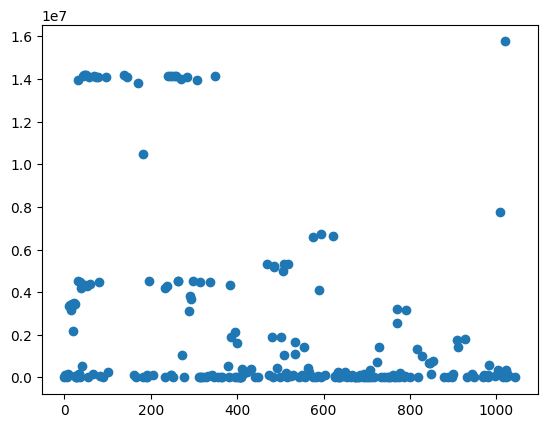

In [21]:
plt.scatter(dfagg['UC Grouping'], dfagg['PopulationDelta'])

In [22]:
dfagg.shape

(228, 42)

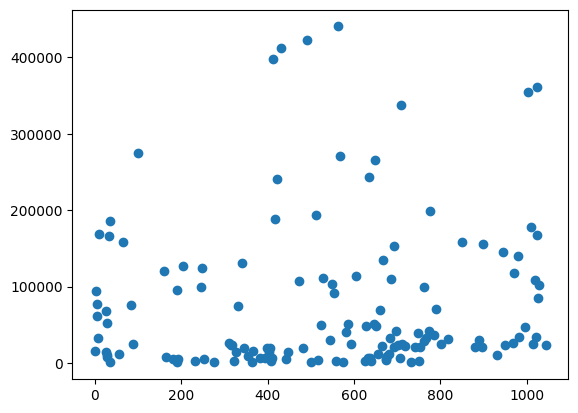

In [23]:
dfagg_2 = dfagg[dfagg['PopulationDelta'] <= 500000].copy()
plt.scatter(dfagg_2['UC Grouping'], dfagg_2['PopulationDelta'])

In [24]:
dfagg_2.shape

(139, 42)

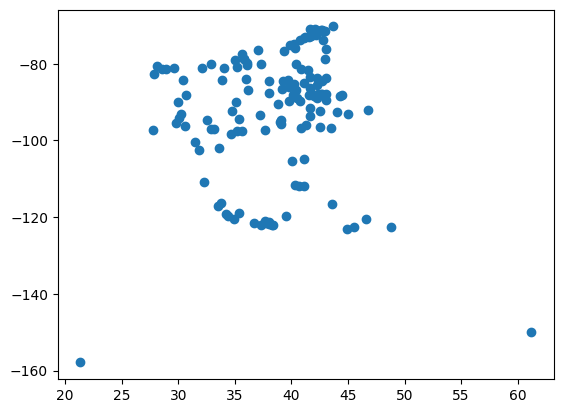

In [25]:
plt.scatter(dfagg_2['Latitude'], dfagg_2['Longitude'])

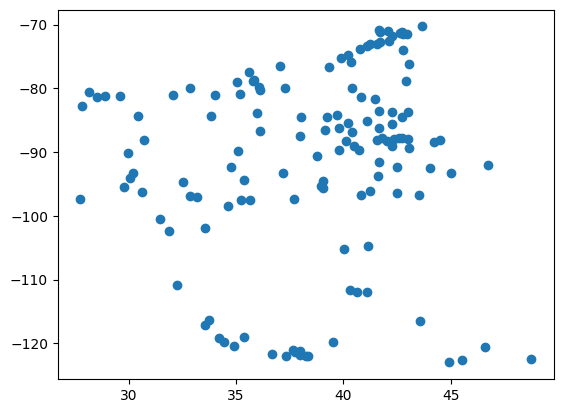

In [26]:
dfagg_3 = dfagg_2[dfagg_2['Longitude'] > -140].copy()
plt.scatter(dfagg_3['Latitude'], dfagg_3['Longitude'])

In [27]:
dfagg_3.shape

(137, 42)

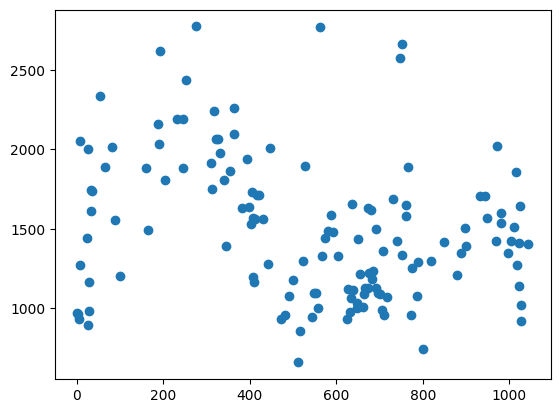

In [30]:
#dfagg_2 = dfagg[dfagg['PopulationDelta'] <= 500000].copy()
plt.scatter(dfagg_3['UC Grouping'], dfagg_3['PopDensity_GS'])

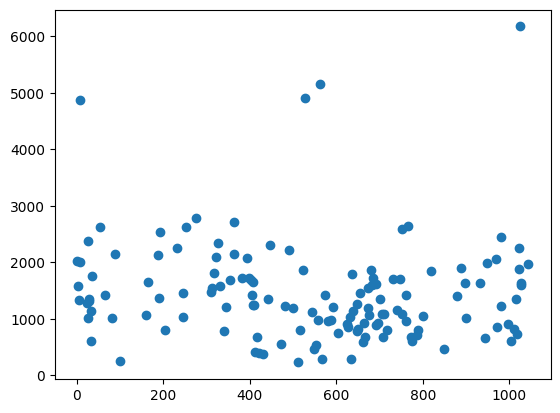

In [31]:
plt.scatter(dfagg_3['UC Grouping'], dfagg_3['PopDensity_MH'])

In [33]:
# dfagg.drop(columns=['UC Grouping'], inplace=True)

# Shuting: keepng UC Grouping column and rename it to UC_Grouping
dfagg_3.rename(columns={'UC Grouping':'UC_Grouping'}, inplace=True)
dfagg_3.to_csv('data/cleaned_data/merged_cleaned_data.csv')
